In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data_1 = pd.read_csv("C:\studia\sem_5\AiBD\lab_6\lab_6\originaldata/11_S╠üLA╠ĘSKIE.csv")
data_1.head()

,Unnamed: 0,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
0,0,10,Beko,33.0,M,1.5
1,1,3,Tefal,NaN,M,3.5
2,2,9,Samsung,44.0,M,2.5
3,3,5,Samsung,40.0,M,0.5
4,4,2,Samsung,48.0,M,3.0


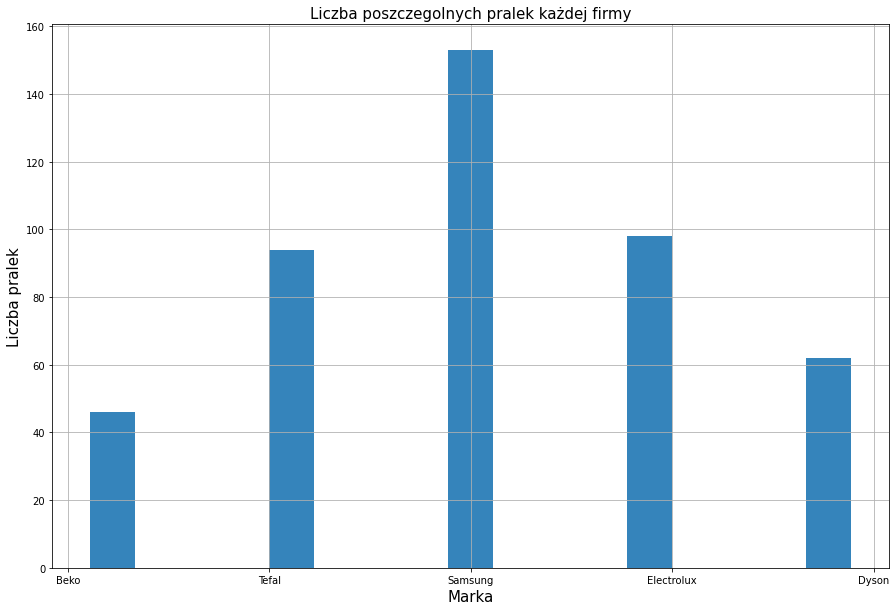

In [2]:
def print_hist(dataframe: pd.DataFrame,col:str,bins:int,title:str,xlabel:str,ylabel:str,alpha: float = 0.9, rwidth: float=0.5):
    fig, ax = plt.subplots(figsize= (15,10))
    n,bins,patches = ax.hist(dataframe[col],bins=bins,alpha=alpha,rwidth=rwidth)
    plt.grid('on')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    fig.savefig("C:\studia\sem_5\AiBD\lab_6\lab_6/analisysdata"+f'/{title}.png')
    plt.show()
print_hist(data_1,'Marka',9,"Liczba poszczegolnych pralek każdej firmy",'Marka','Liczba pralek')

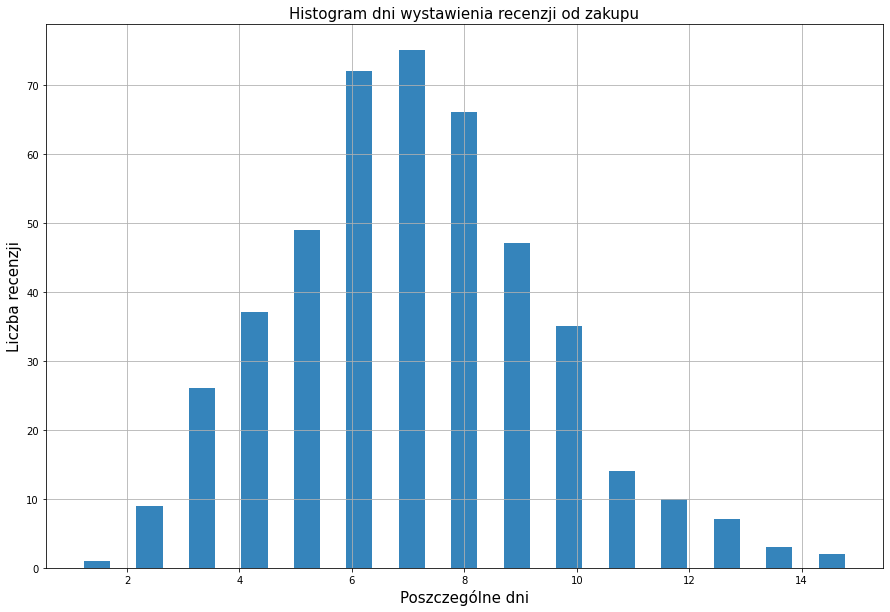

In [3]:
print_hist(data_1,'Dni od zakupu',15,'Histogram dni wystawienia recenzji od zakupu','Poszczególne dni','Liczba recenzji')

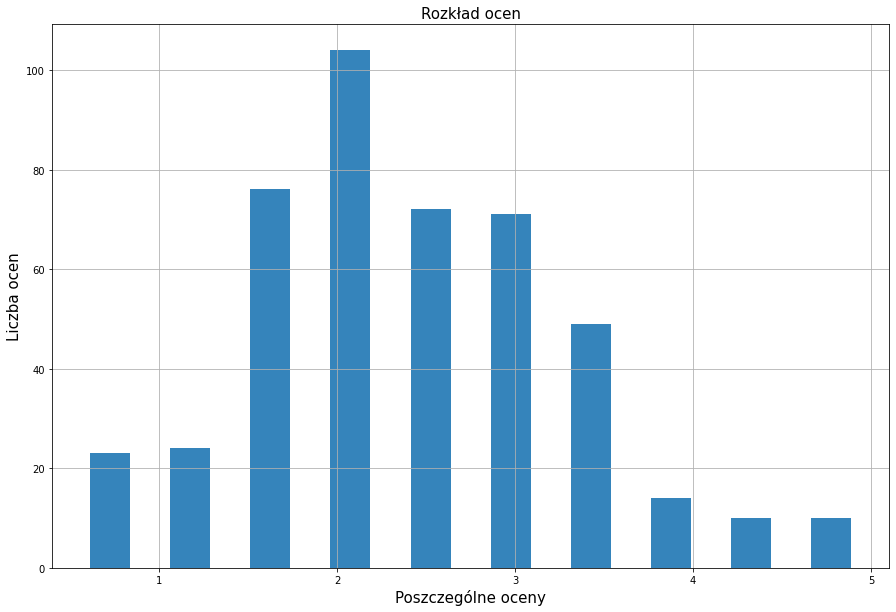

In [4]:
print_hist(data_1,'Ocena',10,'Rozkład ocen','Poszczególne oceny','Liczba ocen')

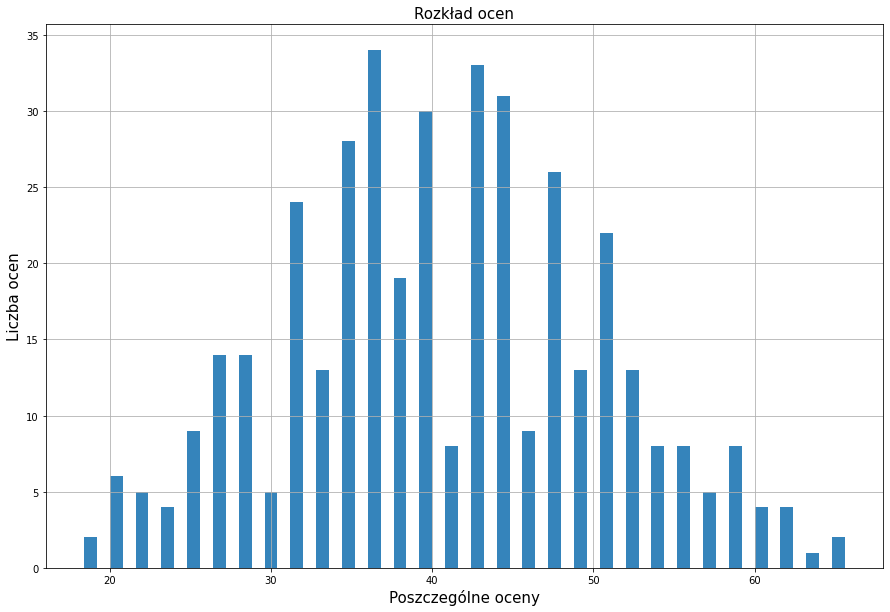

In [5]:
print_hist(data_1,'Wiek kupującego',30,'Rozkład ocen','Poszczególne oceny','Liczba ocen')

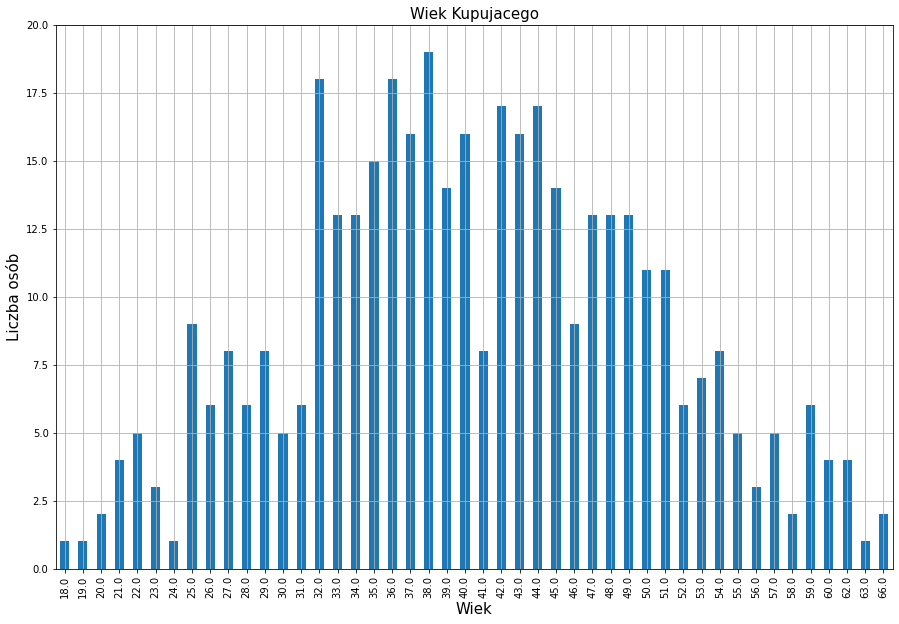

In [6]:
fig, ax = plt.subplots(1, figsize=(15, 10))
data_2 = data_1.dropna()
wiek_kupujacego = data_2["Wiek kupującego"].value_counts(dropna=False).sort_index(ascending=True, na_position='first')
wiek_kupujacego.plot.bar()
plt.grid('on')
plt.title("Wiek Kupujacego", fontsize=15)
plt.xlabel("Wiek", fontsize=15)
plt.ylabel("Liczba osób", fontsize=15)
plt.ylim(0,20)
plt.savefig("C:\studia\sem_5\AiBD\lab_6\lab_6/analisysdata/" + "wiek_kupujacego.png")
plt.show()

In [7]:
z = data_1['Marka']
tab = []
for i in z:
    if i in tab:
        continue
    else:
        tab.append(i)
df_tab = []
for i in range(5):
    df_mar = data_1[data_1['Marka']==tab[i]]
    df_tab.append(df_mar)
    with open("C:\studia\sem_5\AiBD\lab_6\lab_6/analisysdata/"+f"dataFrame_{tab[i]}", "w") as f:
        f.write(df_mar.to_csv(index=True))
print(df_tab[1])

     Unnamed: 0  Dni od zakupu  Marka  Wiek kupującego Płeć kupującego  Ocena
1             1              3  Tefal              NaN               M    3.5
9             9             10  Tefal             48.0               M    2.5
18           18              7  Tefal             28.0               M    2.0
20           20              5  Tefal              NaN               M    2.0
24           24              9  Tefal             49.0               M    2.0
..          ...            ...    ...              ...             ...    ...
424         424              5  Tefal             38.0               M    2.0
433         433              7  Tefal             49.0               K    1.5
445         445              3  Tefal             39.0               M    1.5
449         449              3  Tefal             37.0               M    0.5
451         451              4  Tefal             27.0               M    1.5

[94 rows x 6 columns]


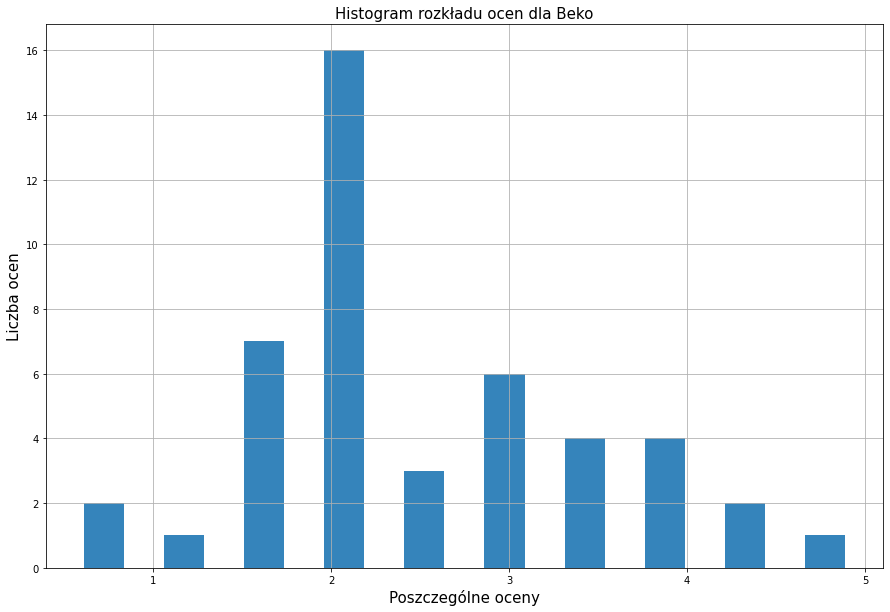

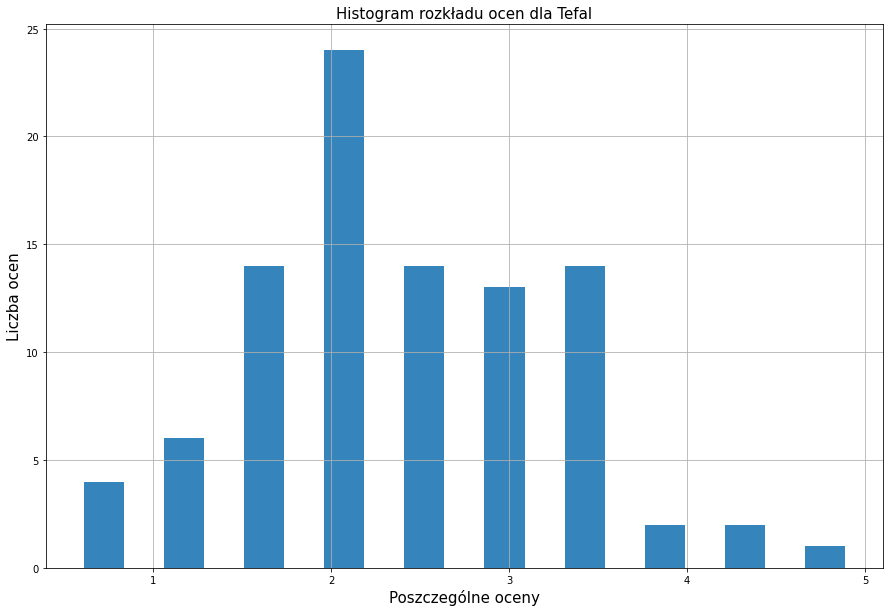

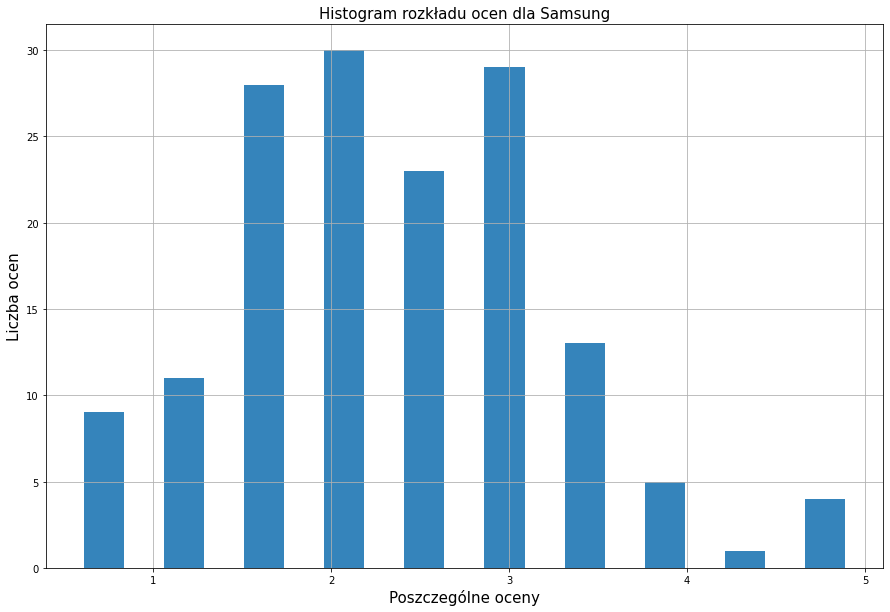

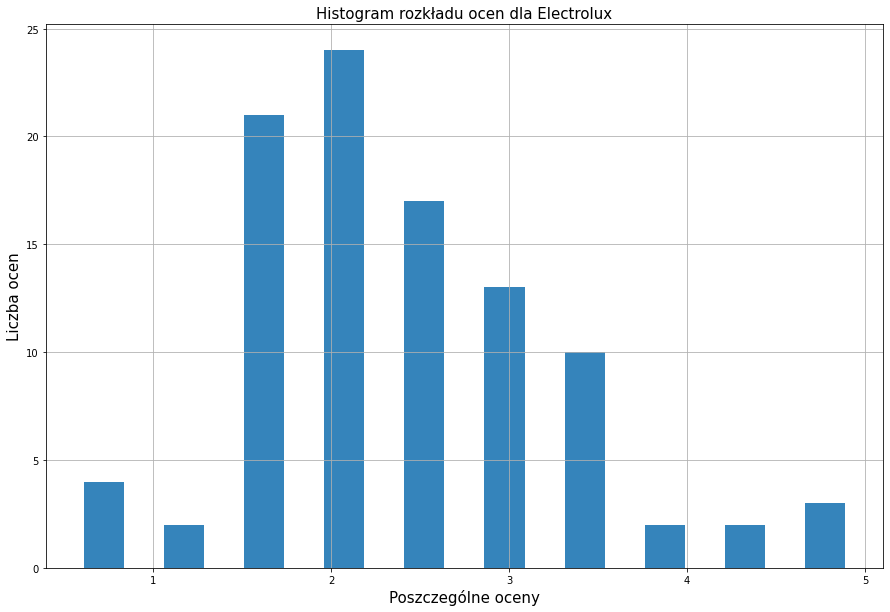

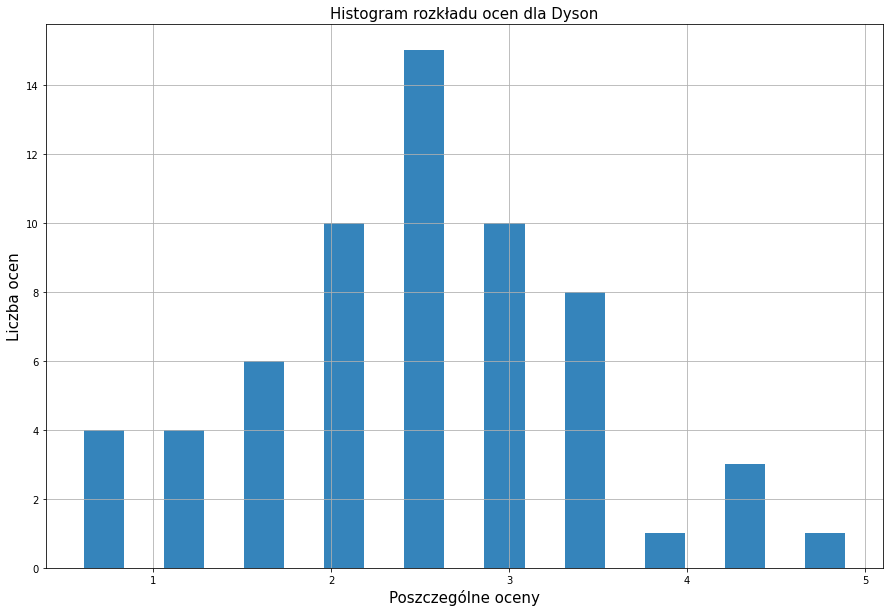

In [8]:
for i in range(5):
    print_hist(df_tab[i], 'Ocena', bins=10, title=f"Histogram rozkładu ocen dla {tab[i]}", xlabel="Poszczególne oceny", ylabel="Liczba ocen")